In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel('salary.xlsx')
df

,Name,Age,Salary
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22 non-null     object
 1   Age     22 non-null     int64 
 2   Salary  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


In [7]:
df.isnull().sum()

Name      0
Age       0
Salary    0
dtype: int64

In [8]:
df.duplicated().sum()

0

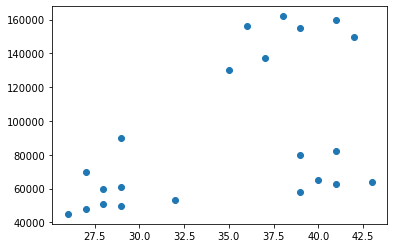

In [9]:
plt.scatter(df.Age , df.Salary)

In [10]:
df2 = df.drop(['Name'], axis=1)
df2

,Age,Salary
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


In [12]:
from sklearn.cluster import KMeans

In [13]:
k = KMeans(n_clusters = 3)

In [14]:
y = k.fit_predict(df2)

In [15]:
y

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [16]:
df2['cluster'] = y

In [17]:
df2

,Age,Salary,cluster
0,27,70000,2
1,29,90000,2
2,29,61000,0
3,28,60000,0
4,42,150000,1
5,39,155000,1
6,41,160000,1
7,38,162000,1
8,36,156000,1
9,35,130000,1


In [18]:
sf0 = df2[df2.cluster == 0]
sf1 = df2[df2.cluster == 1]
sf2 = df2[df2.cluster == 2]

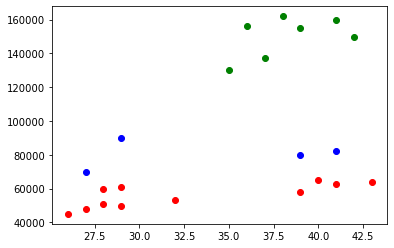

In [22]:
plt.scatter(sf0.Age, sf0.Salary, color = 'red')
plt.scatter(sf1.Age, sf1.Salary, color = 'green')
plt.scatter(sf2.Age, sf2.Salary, color = 'blue' )
#plt.scatter(k.cluster_centers_[:,0], k.cluster_centers_[:,1], color ='black', marker = '*', label = 'centroid', s =300)
plt.show()

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
s = MinMaxScaler()

In [25]:
s.fit(df2[['Salary']])

MinMaxScaler()

In [26]:
df2['Salary'] = s.transform(df2[['Salary']])

In [28]:
s.fit(df2[['Age']])

MinMaxScaler()

In [29]:
df2['Age'] = s.transform(df2[['Age']])

In [30]:
df2

,Age,Salary,cluster
0,0.058824,0.213675,2
1,0.176471,0.384615,2
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1
5,0.764706,0.940171,1
6,0.882353,0.982906,1
7,0.705882,1.000000,1
8,0.588235,0.948718,1
9,0.529412,0.726496,1


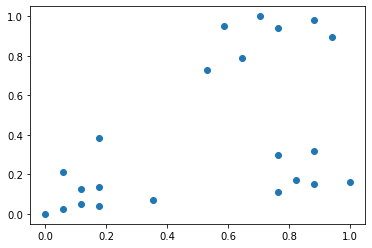

In [31]:
plt.scatter(df2.Age, df2.Salary)

In [32]:
k = KMeans(n_clusters = 3)

In [33]:
y = k.fit_predict(df2)

In [34]:
y

array([0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [35]:
tf0 = df2[df2.cluster == 0]
tf1 = df2[df2.cluster == 1]
tf2 = df2[df2.cluster == 2]

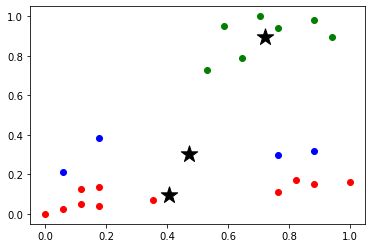

In [37]:
plt.scatter(tf0.Age, tf0.Salary, color = 'red')
plt.scatter(tf1.Age, tf1.Salary, color = 'green')
plt.scatter(tf2.Age, tf2.Salary, color = 'blue' )
plt.scatter(k.cluster_centers_[:,0], k.cluster_centers_[:,1], color ='black', marker = '*', label = 'centroid', s =300)
plt.show()

In [39]:
sse = []
kr = range(1,10)
for k in kr:
    km = KMeans(n_clusters= k)
    km.fit(df2)
    sse.append(km.inertia_)


C:\Users\w-ZONE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [40]:
sse

[18.206738784714794,
 5.811749266056117,
 2.2063390872273496,
 0.8505649401084923,
 0.35222199255988224,
 0.22624835214661027,
 0.1798551535709008,
 0.13717729016210278,
 0.10663983840906671]

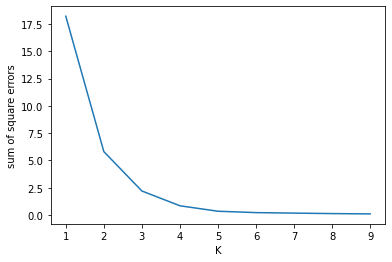

In [41]:
plt.xlabel('K')
plt.ylabel('sum of square errors')
plt.plot(kr, sse)
plt.show()